In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [2]:
data = pd.read_csv('~/input/data/train/train.tsv', sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님


In [3]:
unique_data = data[8].unique()
unique_data

array(['단체:제작', '관계_없음', '단체:별칭', '인물:직업/직함', '인물:부모님', '단체:모회사',
       '단체:구성원', '인물:소속단체', '단체:본사_주(도)', '인물:출신성분/국적', '단체:상위_단체',
       '인물:동료', '인물:형제/자매/남매', '인물:학교', '인물:출생_도시', '인물:종교', '단체:주주',
       '인물:거주_국가', '인물:거주_주(도)', '인물:기타_친족', '단체:본사_국가', '인물:출생_일시',
       '인물:배우자', '단체:본사_도시', '인물:별칭', '인물:제작', '인물:자녀', '인물:사망_일시',
       '단체:해산일', '단체:창립일', '단체:창립자', '단체:하위_단체', '인물:거주_도시', '인물:사망_원인',
       '단체:정치/종교성향', '인물:출생_국가', '단체:자회사', '인물:사망_도시', '인물:용의자',
       '단체:구성원_수', '인물:나이', '인물:사망_국가'], dtype=object)

In [4]:
label_num_counter = {}
for k in unique_data:
    label_num_counter[k] = len(data[data[8]==k])
label_num_counter

{'단체:제작': 171,
 '관계_없음': 4432,
 '단체:별칭': 231,
 '인물:직업/직함': 553,
 '인물:부모님': 164,
 '단체:모회사': 44,
 '단체:구성원': 815,
 '인물:소속단체': 683,
 '단체:본사_주(도)': 23,
 '인물:출신성분/국적': 209,
 '단체:상위_단체': 335,
 '인물:동료': 186,
 '인물:형제/자매/남매': 52,
 '인물:학교': 9,
 '인물:출생_도시': 4,
 '인물:종교': 15,
 '단체:주주': 11,
 '인물:거주_국가': 27,
 '인물:거주_주(도)': 12,
 '인물:기타_친족': 58,
 '단체:본사_국가': 115,
 '인물:출생_일시': 36,
 '인물:배우자': 92,
 '단체:본사_도시': 135,
 '인물:별칭': 103,
 '인물:제작': 56,
 '인물:자녀': 84,
 '인물:사망_일시': 45,
 '단체:해산일': 15,
 '단체:창립일': 67,
 '단체:창립자': 45,
 '단체:하위_단체': 79,
 '인물:거주_도시': 26,
 '인물:사망_원인': 7,
 '단체:정치/종교성향': 18,
 '인물:출생_국가': 8,
 '단체:자회사': 6,
 '인물:사망_도시': 3,
 '인물:용의자': 11,
 '단체:구성원_수': 9,
 '인물:나이': 5,
 '인물:사망_국가': 1}

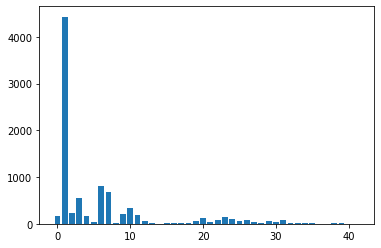

In [5]:
label_num = label_num_counter.values()

x = np.arange(len(label_num))
plt.bar(x, label_num)
plt.show()

In [13]:
train_data = pd.DataFrame()
validation_data = pd.DataFrame()
for k in unique_data:
    temp_data = data[data[8]==k]
    validation_data = validation_data.append(temp_data[:len(temp_data)//5])
    train_data = train_data.append(temp_data[len(temp_data)//5:])

train_data = train_data.sample(frac=1).reset_index(drop=True)
validation_data = validation_data.sample(frac=1).reset_index(drop=True)

print(len(train_data) + len(validation_data))

train_data.head()
validation_data.head()

9000


,0,1,2,3,4,5,6,7,8
0,wikipedia-6785-5-68-74-55-61,2008년 플레이오프 서부콘퍼런스 파이널에서 샌안토니오 스퍼스를 시리즈전적 4승 1...,보스턴 셀틱스,68,74,동부 콘퍼런스,55,61,단체:상위_단체
1,wikipedia-23139-8-28-31-44-47,그러나 1847년에 조성된 약사불 화기(畵記)에 '약사여래 아미타여래 지장보살 주산...,약사여래,28,31,주산대왕,44,47,관계_없음
2,wikitree-5977-5-60-62-54-57,3학년이던 지난 2017년 한국 복싱 사상 최초로 세계 여자유스 복싱선수권대회에서 ...,이용대,60,62,배드민턴,54,57,관계_없음
3,wikipedia-24801-6-4-6-0-2,"스웨덴 해적당을 모델로 여러나라에서 해적당이 창당되었으며, 이들은 국제조직 해적당 ...",해적당,4,6,스웨덴,0,2,단체:본사_국가
4,wikipedia-13080-25-57-59-45-45,"그러나 작전 도중 예상하지 못했던 뒤집힌 차에 의해 계획이 중단된 후, 주인공은 캣...",사토르,57,59,캣,45,45,관계_없음


In [14]:
train_data.to_csv('~/input/data/train/new_train.tsv', sep='\t', header = None, index = False)
validation_data.to_csv('~/input/data/train/val_train.tsv', sep='\t', header = None, index = False)